## Magnetic anomalies of simple bodies 

The magnetic field caused by a magnetization $\vec M$ vector can be computed by (Blakely, 1995):
$$\vec B(\vec r) = \frac{\mu_0 M}{4\pi r^3} \left[ 3 (\vec M \cdot \vec r)\vec r - \vec M \right] $$
where $\vec r=\vec r_P - \vec r_Q$ is the space vector between the magnetic moment Q and the measuring point P.

We first import some libraries for numerical analysis and plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook
%matplotlib notebook

Let us write a function 

In [2]:
def magneticDipole(Q, M, P=None, x=None, y=0., z=0., alpha=0, cylinder=False):
    """Compute magnetic field.
    
    Parameters
    ----------
    Q : array 3x1
        position of magnetic dipole
    M : array 3x1   
        magnetization vector
    P : array 3xN
        measuring positions
    x : array N
        positions as profile
    y/z : array | float
        y and z positions
    alpha : profile direction (degree)
        profile direction
    cylinder : bool [False]
        use line/cylinder instead of point/sphere
    """
    if x is not None:
        if isinstance(z, (int, float)):
            z = np.ones_like(x) * z
        if isinstance(y, (int, float)):
            y = np.ones_like(x) * y
        
        P = np.column_stack([x * np.cos(np.deg2rad(alpha)), 
                             y + x * np.sin(np.deg2rad(alpha)), z])
    
    P -= Q
    r = np.sqrt(np.sum(P**2, axis=1))  # distance as scalar
    M0 = np.linalg.norm(M)
    M = np.array(M, dtype=float) / M0  # unit vector
    R = P / np.reshape(r, [-1, 1])  # norm vectors
    my0 = 4 * np.pi * 1e-7
    if cylinder:
        fak = np.reshape(my0 * M0 / 2 / np.pi / r**2, [-1, 1])
        return (np.reshape(R.dot(M), [-1, 1]) * R * 2 - M) * fak
    else:
        fak = np.reshape(my0 * M0 / 4 / np.pi / r**3, [-1, 1])
        return (np.reshape(R.dot(M), [-1, 1]) * R * 3 - M) * fak

<IPython.core.display.Javascript object>


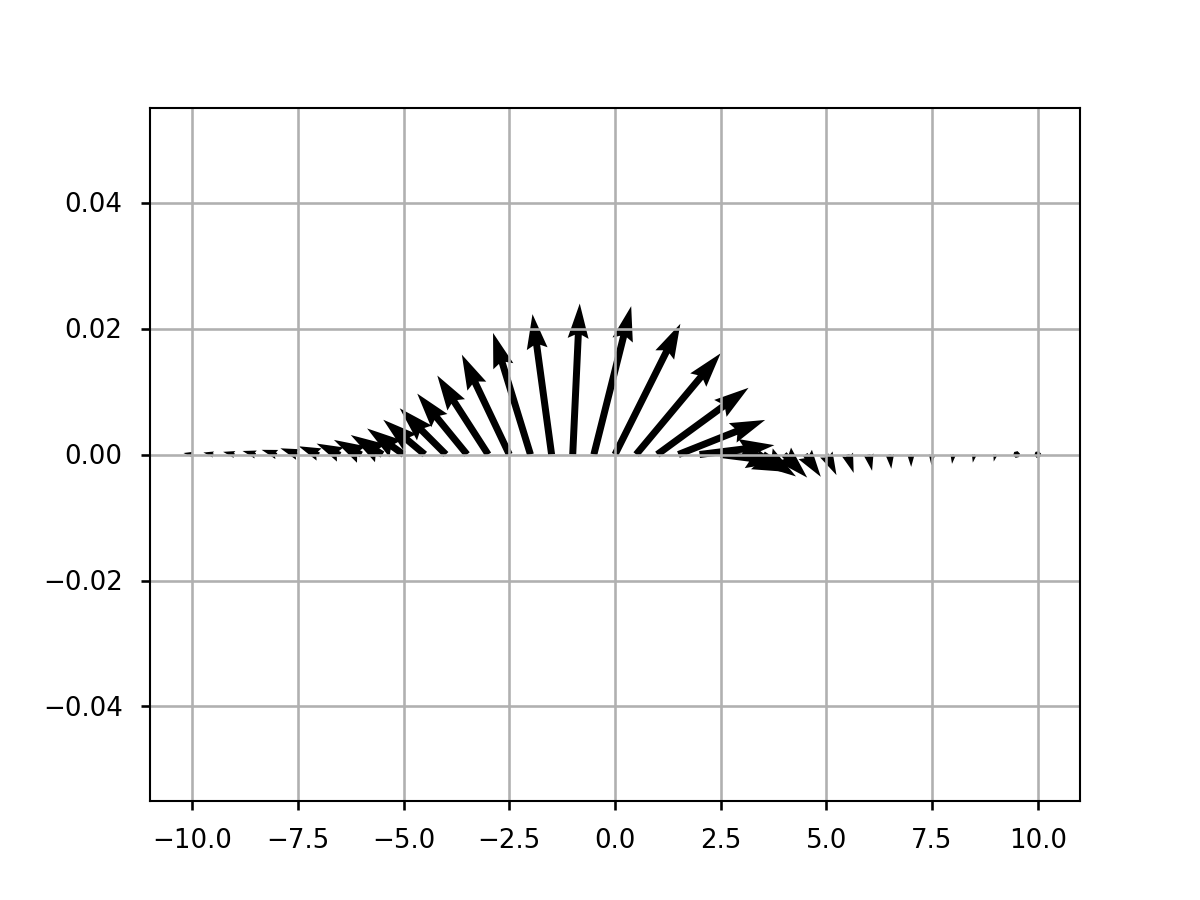

In [3]:
M = np.array([-1, 0, 1]) * 100  # magnetization
Q = [0, 0, -3]  # location of the source
x = np.arange(-10, 10.1, 0.5)
B = magneticDipole(Q, M, x=x, z=1, alpha=0)
plt.quiver(x, x*0, B[:, 0], B[:, 2]);
plt.grid();
#ax = plt.figure().add_subplot(projection='3d')
#ax.quiver(x, x*0, x*0, B[:, 0], B[:, 1], B[:, 2], length=0.1, normalize=True);

<IPython.core.display.Javascript object>


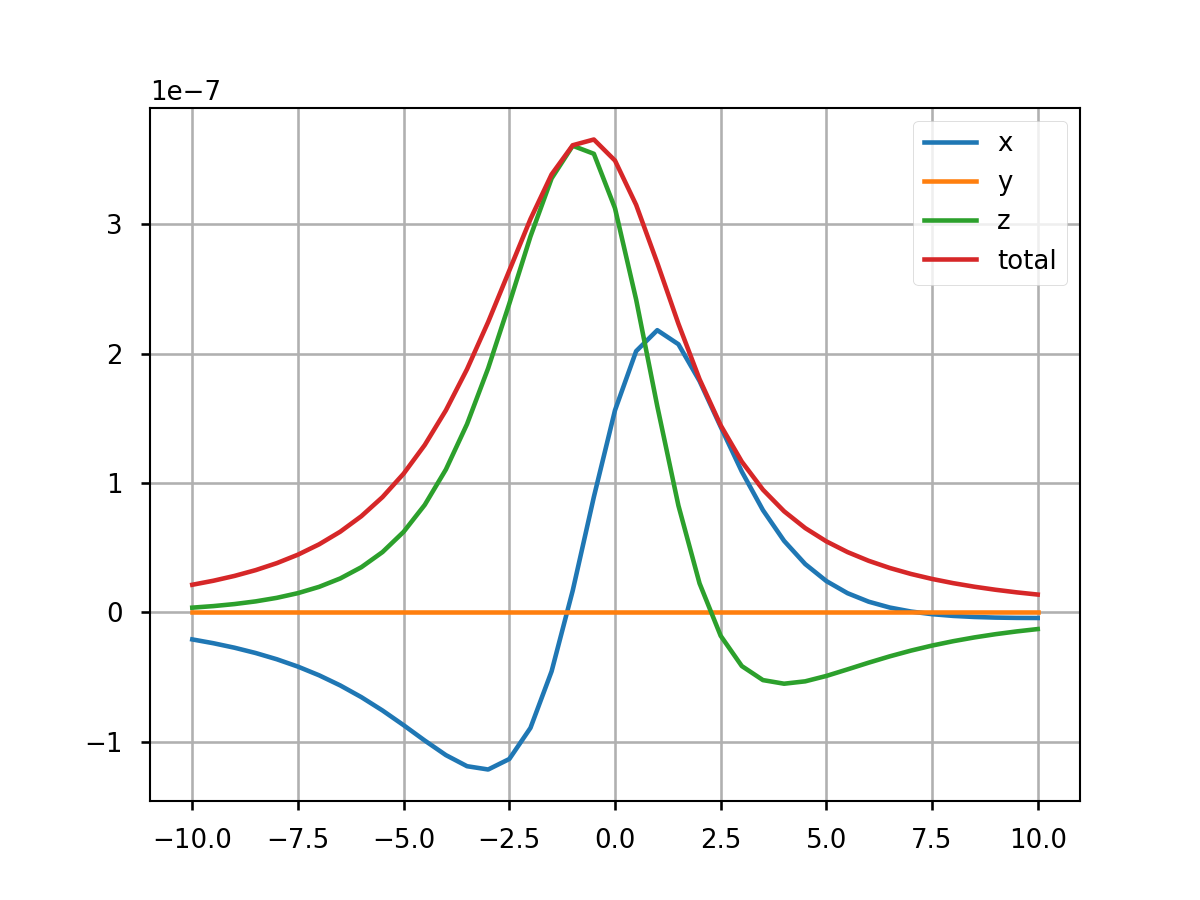

In [4]:
fig, ax = plt.subplots()
for i, t in enumerate("xyz"):
    ax.plot(x, B[:, i], label=t)

ax.plot(x, np.linalg.norm(B, axis=1), label="total")
ax.legend()
ax.grid()

This anomalous field is overlain by the Earth's magnetic field of a total field intensity F, an inclination I and a declination D. We use typical values for Germany.

In [5]:
F = 48000 * 1e-9  # 48000 nT = 48µT
I = 67  # degrees
D = 2
Z = F * np.sin(np.deg2rad(I))
H = F * np.cos(np.deg2rad(I))
X = H * np.sin(np.deg2rad(D))
Y = H * np.cos(np.deg2rad(D))
print(X, Y, Z)

6.545433470532427e-07 1.8743669070863993e-05 4.418423296571714e-05


<IPython.core.display.Javascript object>


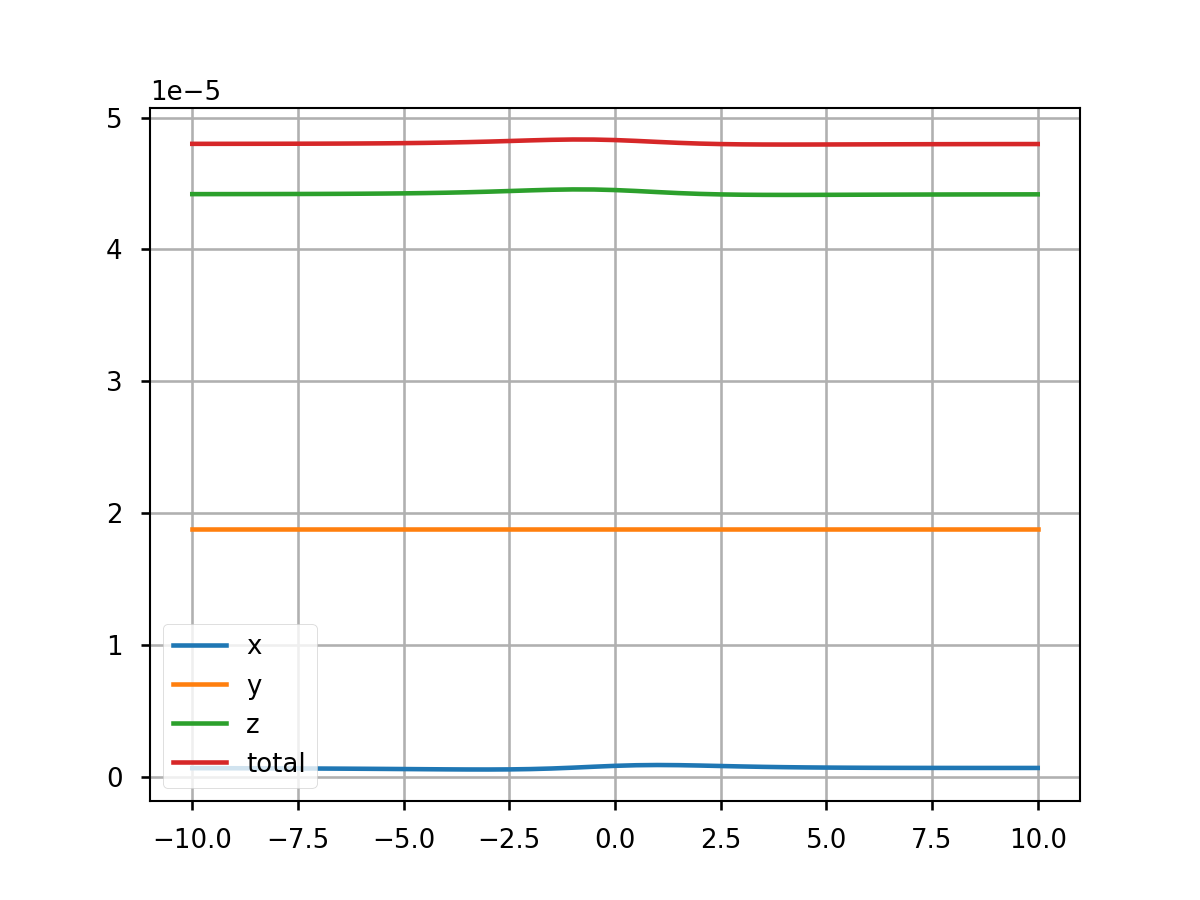

In [6]:
Btotal = B + np.array([[X, Y, Z]]);
fig, ax = plt.subplots()
for i, t in enumerate("xyz"):
    ax.plot(x, Btotal[:, i], label=t)

ax.plot(x, np.linalg.norm(Btotal, axis=1), label="total")
ax.legend()
ax.grid()

<IPython.core.display.Javascript object>


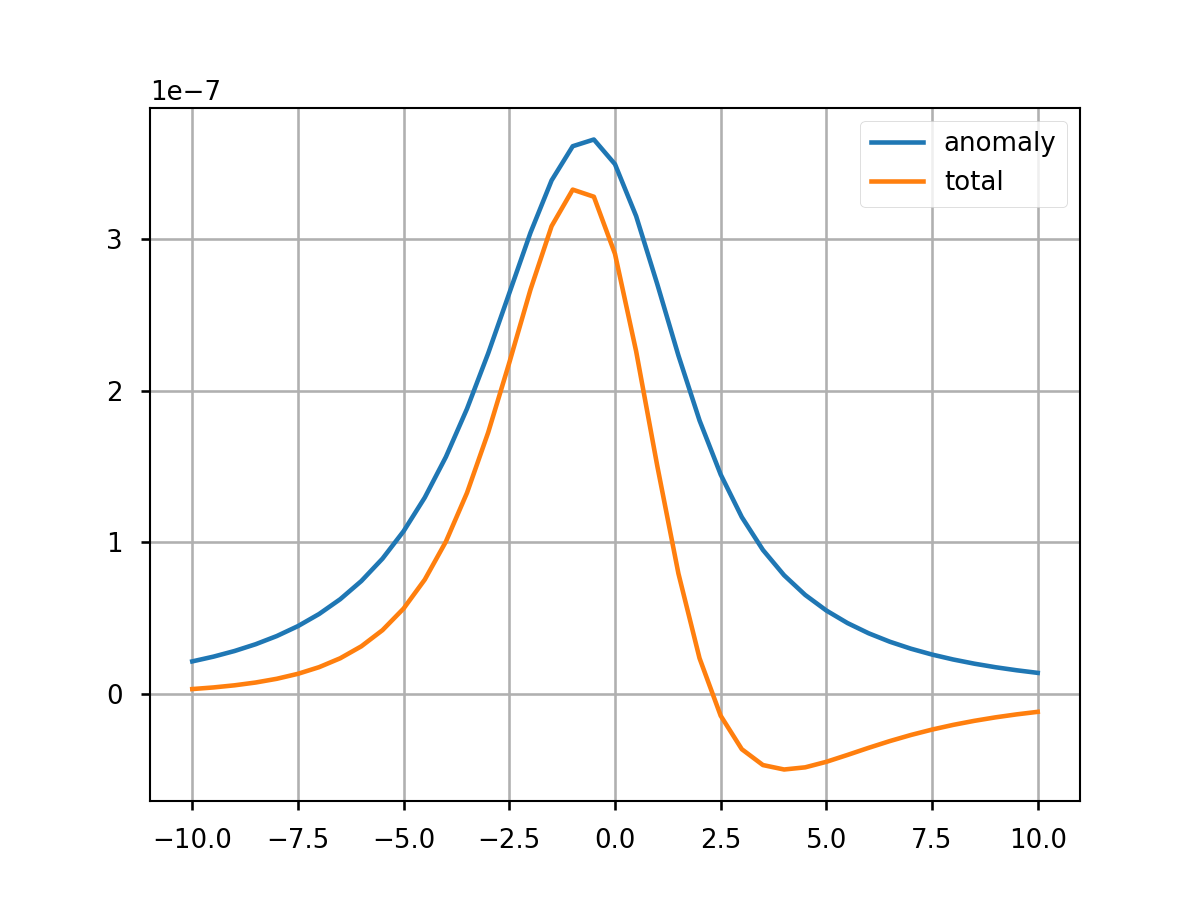

In [7]:
fig, ax = plt.subplots()
ax.plot(x, np.linalg.norm(B, axis=1), label="anomaly")
ax.plot(x, np.linalg.norm(Btotal, axis=1)-F, label="total")
ax.legend()
ax.grid()

<IPython.core.display.Javascript object>


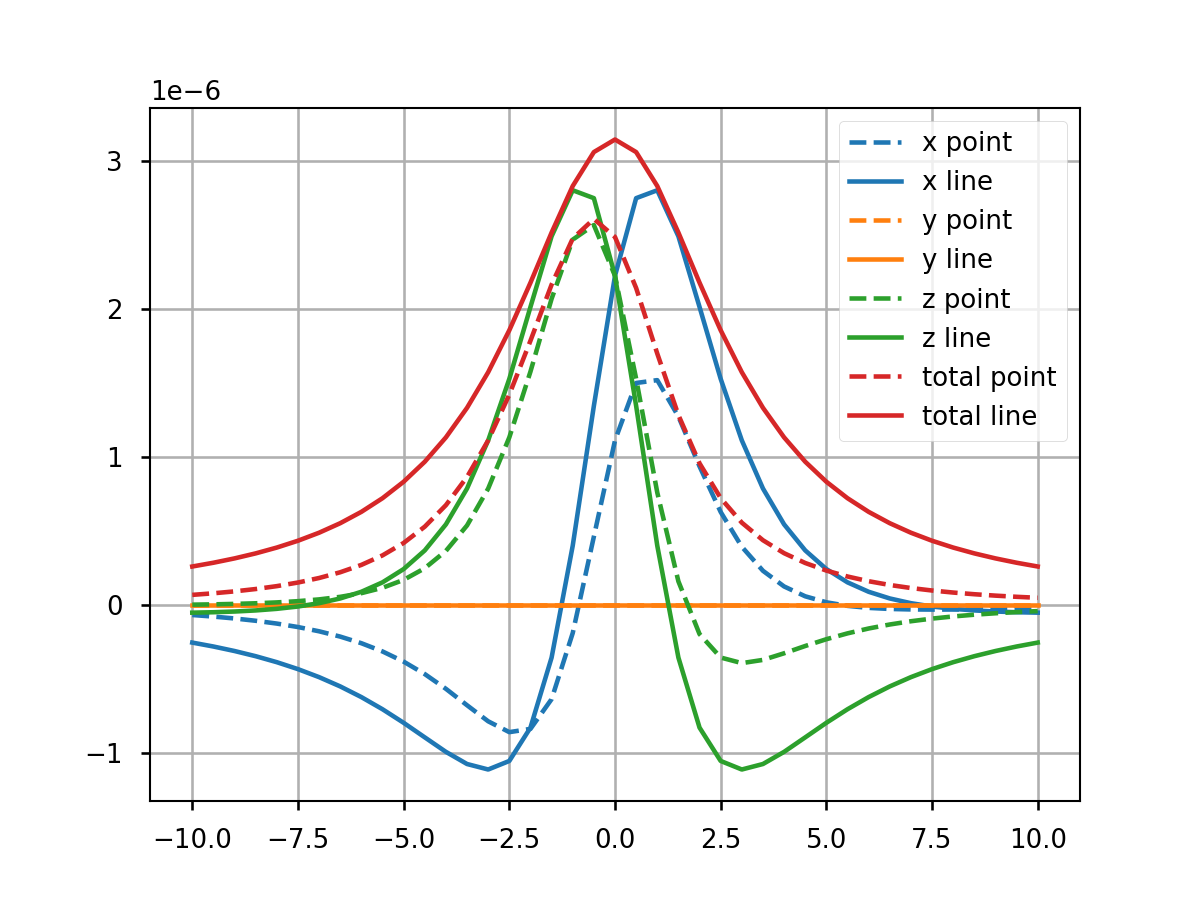

In [8]:
# compare point and line source
M = np.array([-1, 0, 1]) * 100  # magnetization
Q = [0, 0, -3]  # location of the source
x = np.arange(-10, 10.1, 0.5)
Bpoint = magneticDipole(Q, M*3, x=x)
Bline = magneticDipole(Q, M, x=x, cylinder=True)
fig, ax = plt.subplots()
for i, t in enumerate("xyz"):
    ax.plot(x, Bpoint[:, i], label=t+" point", color=f"C{i}", ls="dashed")
    ax.plot(x, Bline[:, i], label=t+" line", color=f"C{i}")

ax.plot(x, np.linalg.norm(Bpoint, axis=1), label="total point", color="C3", ls="dashed")
ax.plot(x, np.linalg.norm(Bline, axis=1), label="total line", color="C3")
ax.legend()
ax.grid()

<IPython.core.display.Javascript object>


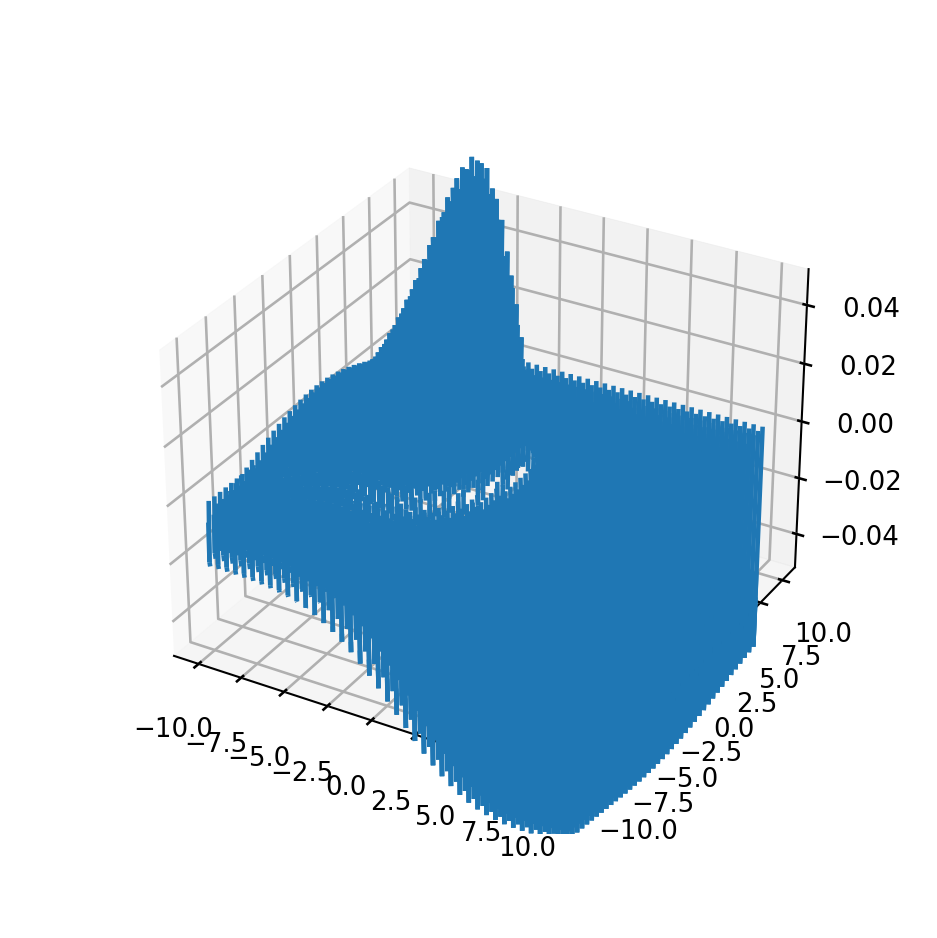

In [9]:
M = np.array([-1, 0, 1]) * 100  # magnetization
Q = [0, 0, -3]  # location of the source
x = np.arange(-10, 10.1, 0.5)
xx, yy = np.meshgrid(x, x)
B = magneticDipole(Q, M, x=xx.flat, y=yy.flat)
# plt.quiver(xx.flat, yy.flat, B[:, 0], B[:, 2]);
# plt.grid()
ax = plt.figure(figsize=(5, 5)).add_subplot(projection='3d')
ax.quiver(xx.flat, yy.flat, 0, B[:, 0], B[:, 1], B[:, 2], length=0.1, normalize=True);

In [10]:
Btotal = B + np.array([[X, Y, Z]]);
Banomaly = np.linalg.norm(Btotal, axis=1).reshape(xx.shape) - F

<IPython.core.display.Javascript object>


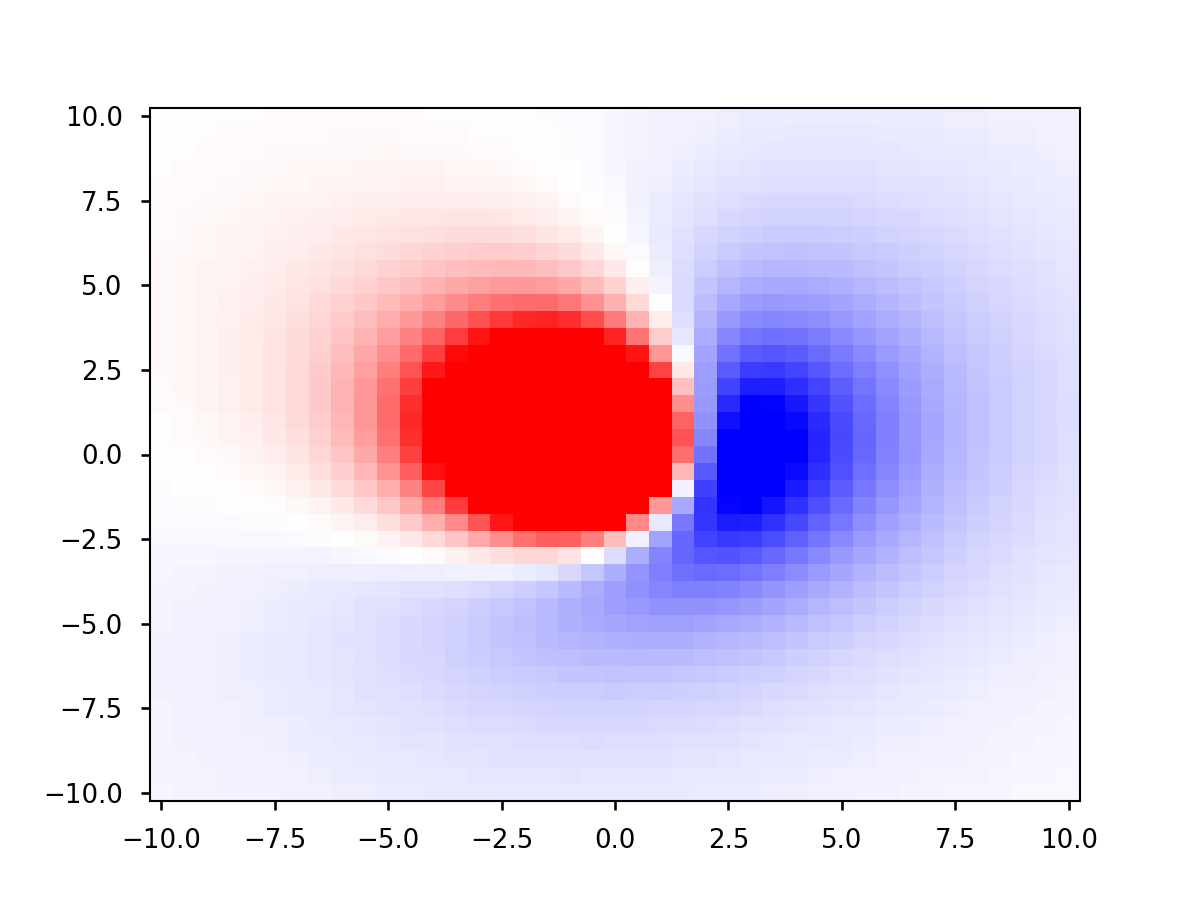

In [11]:
fig, ax = plt.subplots()
scal = 100e-9
ax.pcolormesh(xx, yy, Banomaly, vmin=-scal, vmax=scal, cmap="bwr");

1. Play around with different magnetization directions
2. Change global magnetic field (inclination, declination, total field)